In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from keras.datasets import mnist, fashion_mnist, cifar100, cifar10
from keras.backend import cast_to_floatx
from sklearn.preprocessing import MinMaxScaler
import random
random.seed(0)

## **Load the Data**

In [2]:
from keras.datasets import mnist
def load_data():
  (X_train, y_train), (X_test, y_test) = mnist.load_data()
  X_train = X_train.reshape(X_train.shape[0], -1)
  X_test = X_test.reshape(X_test.shape[0], -1)
  return (X_train, y_train), (X_test, y_test)

In [3]:
(X_train, y_train), (X_test, y_test) = load_data()

In [4]:
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
def preprocess_data(data):
  scaler = StandardScaler()
  data_std = scaler.fit_transform(data)
  n_components = 30
  pca = PCA(n_components=n_components)
  data_pca = pca.fit_transform(data_std)
  return data_pca

In [5]:
X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)

In [6]:
'''y_train = y_train[:,0]
y_test = y_test[:,0]'''

'y_train = y_train[:,0]\ny_test = y_test[:,0]'

In [7]:
train_data_0 = pd.DataFrame(X_train[y_train == 0])
train_data_1 = pd.DataFrame(X_train[y_train == 3])[:1000]
train_data = pd.DataFrame(pd.concat([train_data_0,train_data_1]))
train = train_data.reset_index(drop = True)

train_label_0 = pd.DataFrame(y_train[y_train == 0])
train_label_1 = pd.DataFrame(y_train[y_train == 3])[:1000]
train_data_label = pd.DataFrame(pd.concat([train_label_0,train_label_1]))
y_train = np.array(train_data_label.reset_index(drop = True))
y_train = np.array([0 if elem==0 else 1 for elem in y_train])

In [8]:
test_data_0 = pd.DataFrame(X_test[y_test.flatten() == 0])
test_data_1 = pd.DataFrame(X_test[y_test.flatten() == 3])[:200]
test_data = pd.DataFrame(pd.concat([test_data_0,test_data_1]))
test = test_data.reset_index(drop = True)

test_label_0 = pd.DataFrame(y_test[y_test == 0])
test_label_1 = pd.DataFrame(y_test[y_test == 3])[:200]
test_data_label = pd.DataFrame(pd.concat([test_label_0,test_label_1]))
y_test = np.array(test_data_label.reset_index(drop = True))
y_test = np.array([0 if elem==0 else 1 for elem in y_test])

In [9]:
scaler = MinMaxScaler()
train = scaler.fit_transform(train)
train = np.array(train)
train = train / train.sum(axis=1, keepdims=True)
train = np.clip(train,0.0000005,None)

In [10]:
scaler = MinMaxScaler()
test = scaler.fit_transform(test)
test = np.array(test)
test = test / test.sum(axis=1, keepdims=True)
test = np.clip(test,0.0000005,None)

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score,ConfusionMatrixDisplay

##**SVM**

In [12]:
# Train SVM classifier
print("Training SVM classifier...")
svm = SVC(kernel='poly', C=0.0001,degree=3, gamma='scale', random_state=42)
svm.fit(train, y_train)

Training SVM classifier...


SVC(C=0.0001, kernel='poly', random_state=42)

In [13]:
# Test SVM classifier
print("Testing SVM classifier...")
y_pred_svm = svm.predict(test)

Testing SVM classifier...


In [14]:
# Evaluate the performance of the classifier
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

F1 Score: 0.6873614190687362
Precision: 0.6175298804780877
Recall: 0.775
Confusion Matrix:
 [[884  96]
 [ 45 155]]
Accuracy: 0.8805084745762712


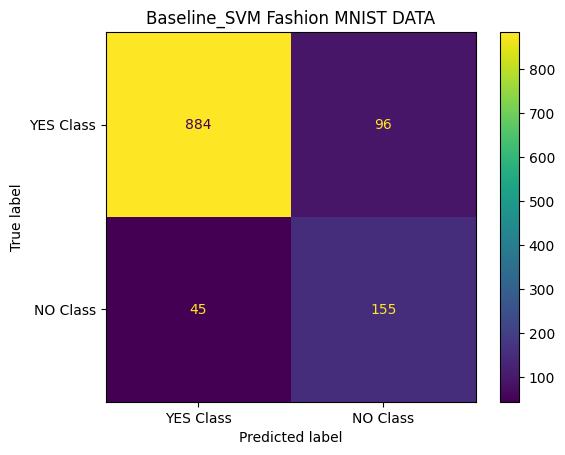

In [15]:
cm = confusion_matrix(y_test, y_pred_svm)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['YES Class', 'NO Class'])
cm_display.plot()
cm_display.ax_.set_title('Baseline_SVM Fashion MNIST DATA')
plt.show()